In [1]:
import numpy as np
import sys
sys.path.append('../src/')
from DensityCanvas import DensityCanvas
from norms import Lp_norm, Lp_distance, KL_norm, JS_norm

# Intro
A density canvas is intended as a class to strandardize the way we work with densities.<br>
It is essentially a 2d canvas where we can define a scalar density function.<br>
It is supposed to automatize certain recurring operations: generating sum of gaussians, performing arithmetic operations between two densities, calculating norms, embedding registers, calculating QUBO coefficients, and more.<br>
This notebook presents the functionalities implemented so far.  


## Creating a canvas
To create a canvas, you need to supply:
1. An origin (coordinates of the bottom left corner)
2. The length in X and Y direction (as two separate variables)
3. The resolution in X and Y direction (as two separate variables)

In [2]:
# this creates an empty canvas representing a 40x40 region, composed of 1200x1200=1440000 points
stg = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=1200,
    npoints_y=1200,
    )

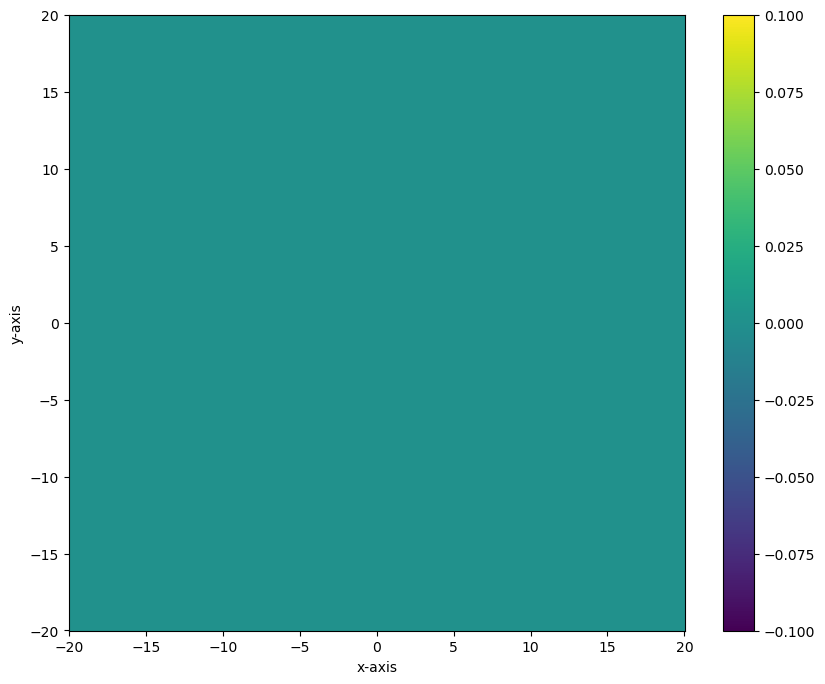

In [3]:
# a canvas can be drawn, but at first it's just empty so it's just a flat 2d plot that is 0 everywhere
stg.draw()

## Defining a density
You can define a density to put in a canvas. For now you can either pass an existing density (as a numpy array) that you got from somewhere else, or you can define it as a sum of Gaussians. To define a density as a sum of Gaussians you need to provide:
1. The centers of the Gaussians (as a list of coordinates)
2. The variance of the Gaussians (as a single number)
3. the amplitude of the gaussians (as a single number) 

In [4]:
# define centers, variances, amplitudes
centers = np.array([[0,0], [5,5], [-3,-3]])
variance = 1
amplitude = 10

# assign the density to the canvas
stg.set_density_from_gaussians(
    centers=centers,
    amplitude=amplitude,
    variance=variance
)

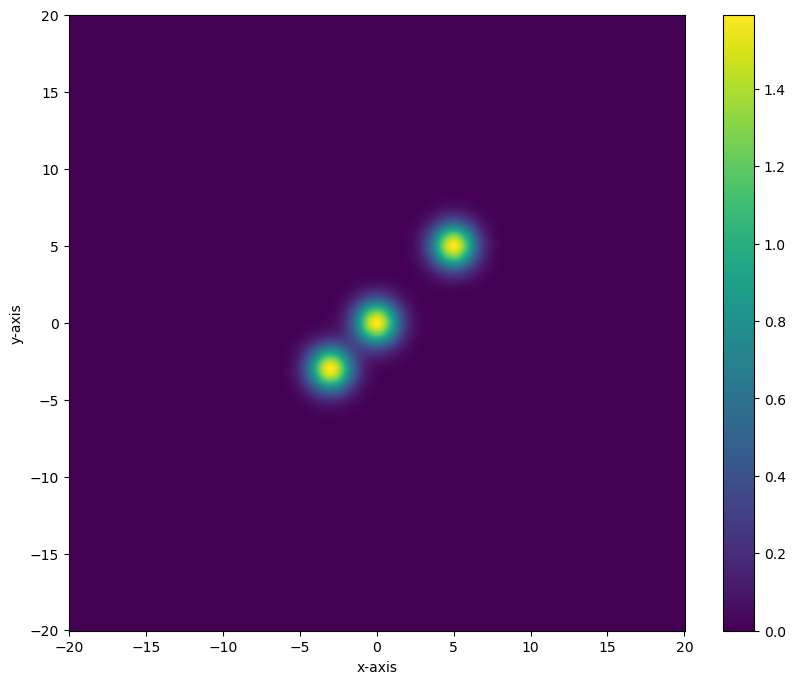

In [5]:
# now you can plot it again to see the Gaussians

stg.draw()

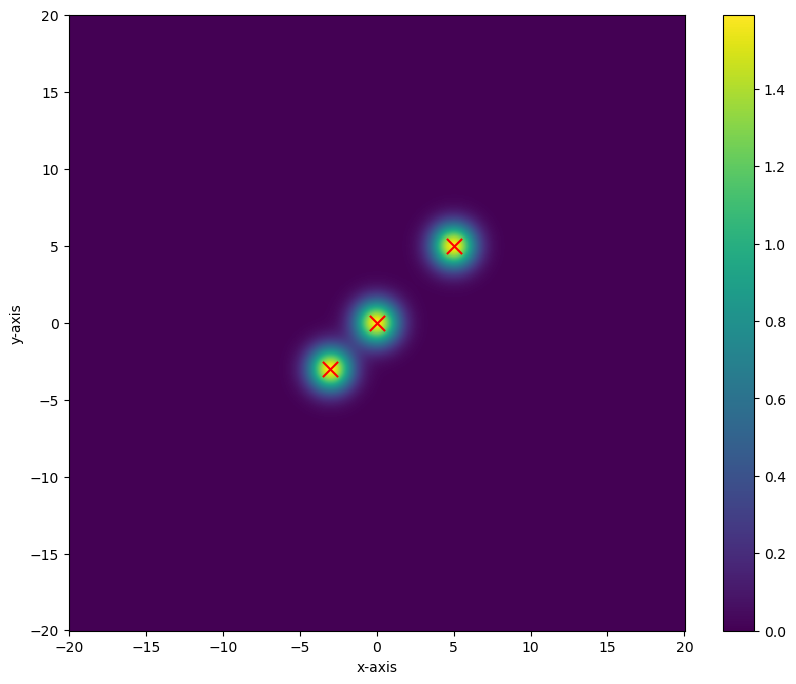

In [6]:
# you can also choose to display the center of the Gaussians as red crosses
stg.draw(draw_centers=True)

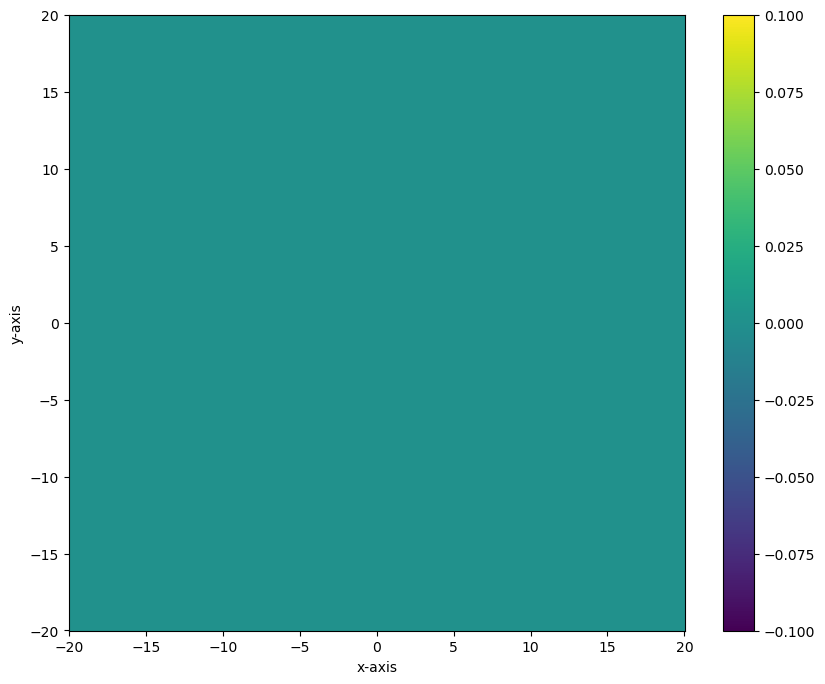

In [7]:
# if you wish, you can delete every density related info from a canvas.
# plotting it will return an empty one.

stg.clear_density()
stg.draw()

## Arithmetic operations
You can perform binary arithmetic operations with canvases:
1. sum and difference (element-wise sum/difference between the densities)
2. product of two canvases (element-wise product between the two densities)
3. product between a number and a canvas (multiply density by a fixed value)
4. Taking powers of a canvas (element-wise power of density)

In order for the operations to be well defined, the two canvases need to be built with the same parameters (same origin, same length, same resolution)

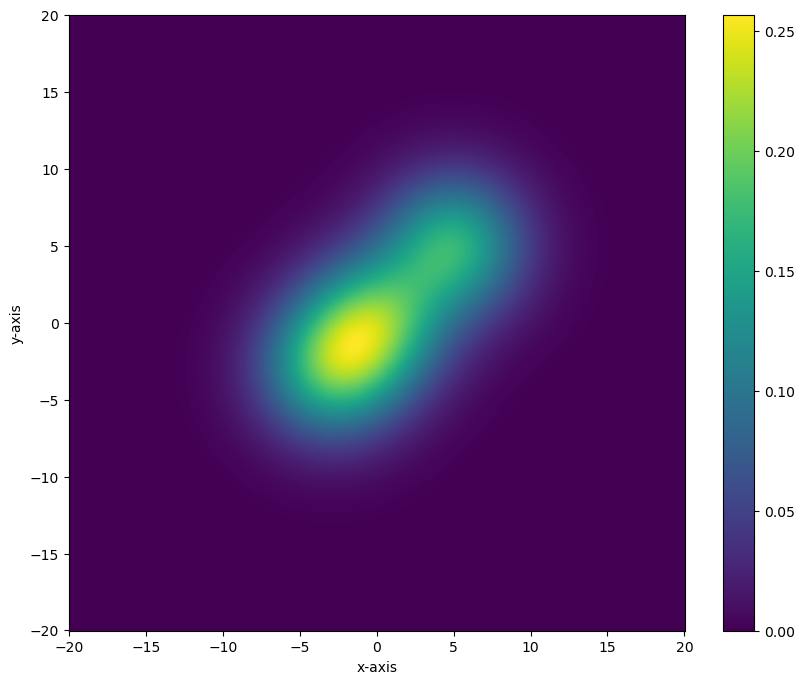

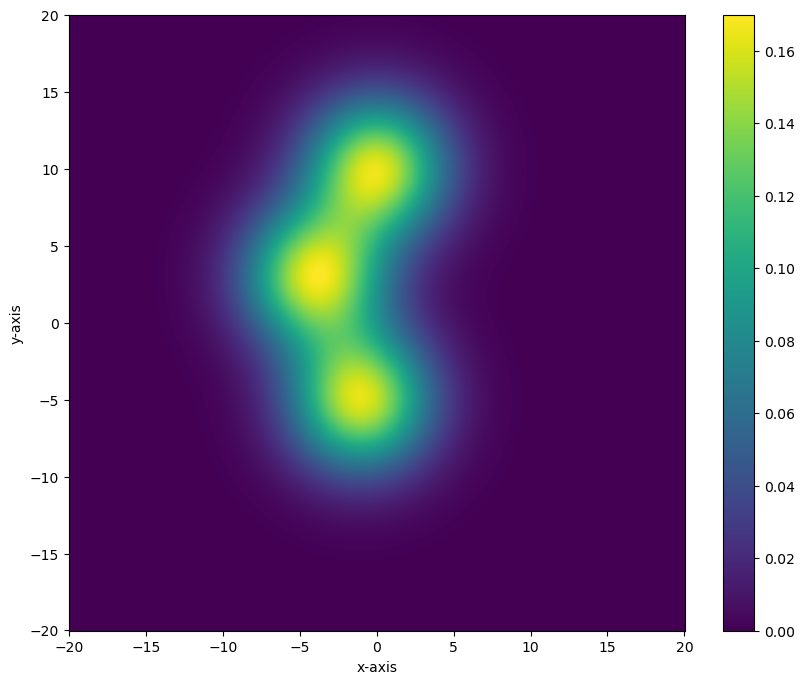

In [8]:
# define two test canvases

stg1 = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=1200,
    npoints_y=1200,
    )

stg2 = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=1200,
    npoints_y=1200,
    )


centers1 = np.array([[0,0], [5,5], [-3,-3]])
centers2 = np.array([[0,10], [-4,3], [-1,-5]])
variance = 10
amplitude = 10

stg1.set_density_from_gaussians(centers1, amplitude, variance)
stg2.set_density_from_gaussians(centers2, amplitude, variance)

stg1.draw()
stg2.draw()


In [9]:
# sum
sum_stg = stg1 + stg2

# difference
diff_stg = stg1 - stg2

# canvas product
prod_stg = stg1*stg2

# scalar product
scal_prod_stg = 5*stg1

# power
pow_stg = stg1**4

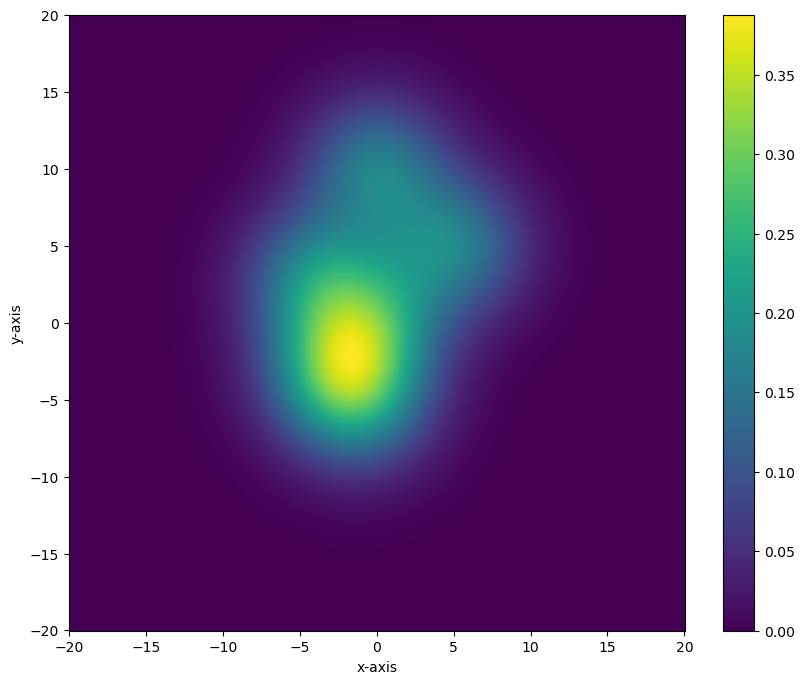

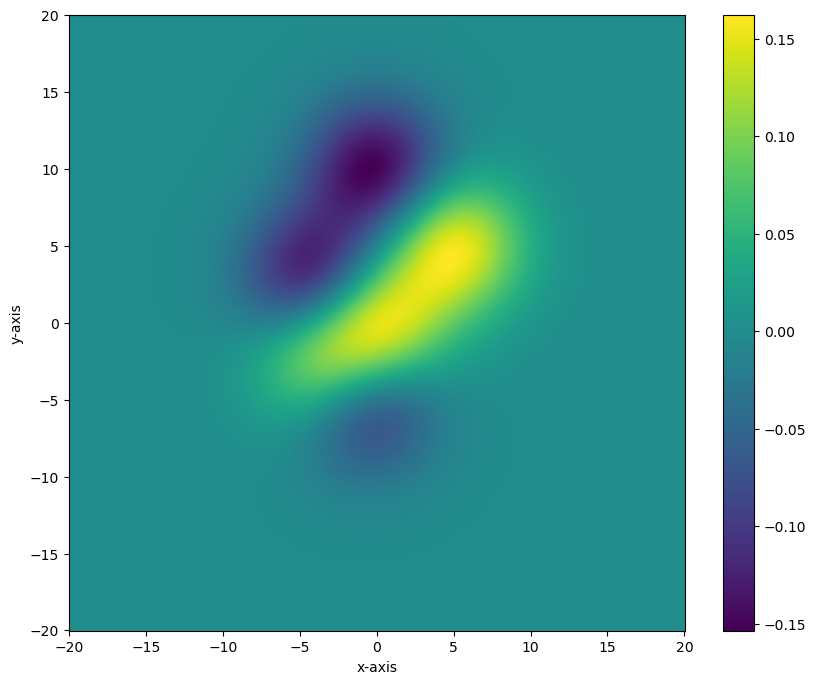

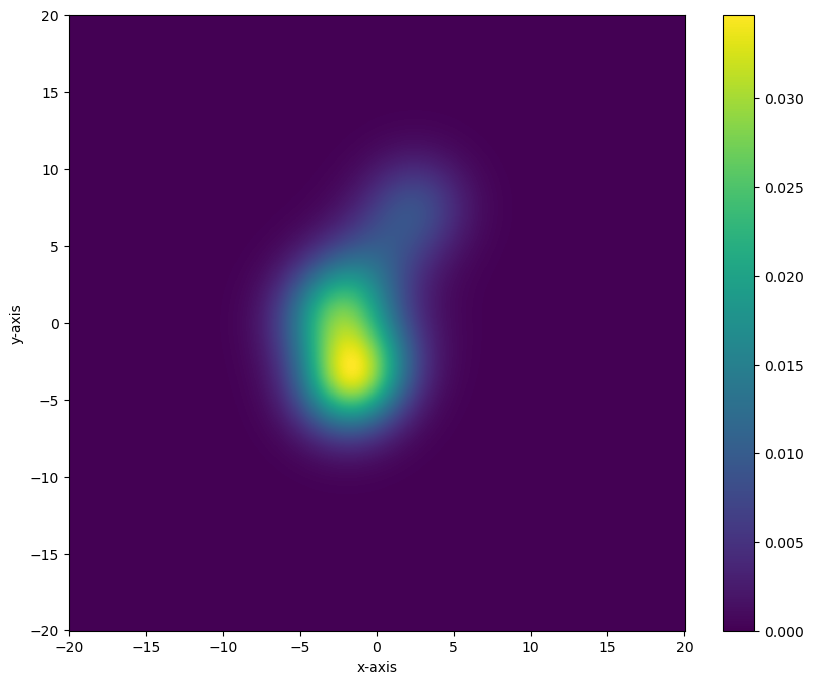

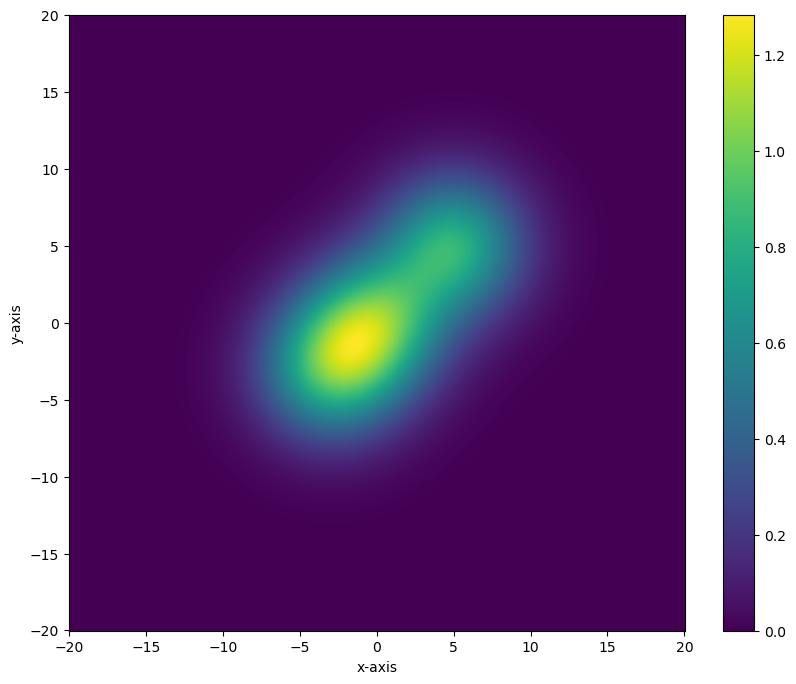

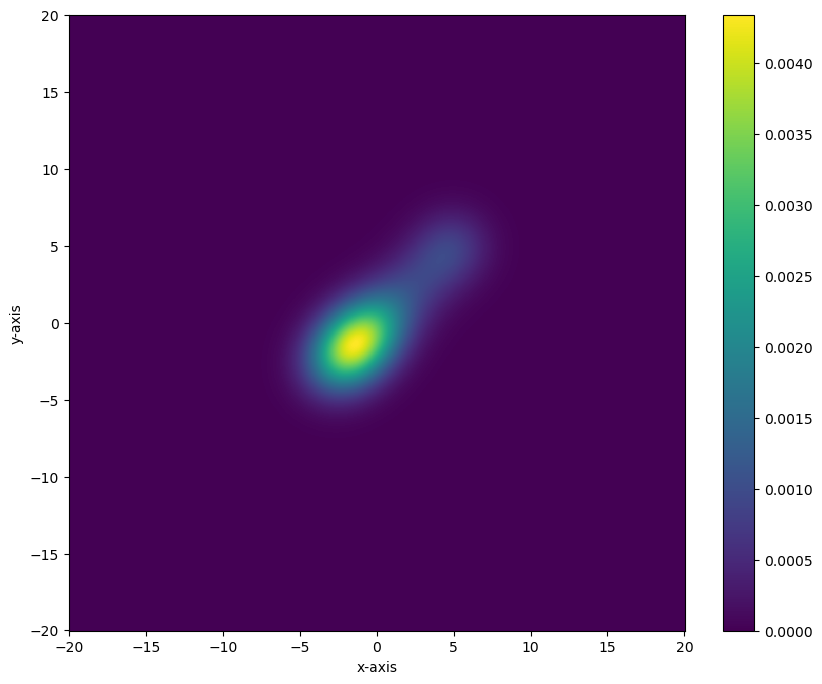

In [10]:
#visualize
sum_stg.draw()
diff_stg.draw()
prod_stg.draw()
scal_prod_stg.draw()
pow_stg.draw()

## Integral

It is possible to integrate a canvas (meaning taking the integral of the density in the whole region)

In [11]:
# to integrate, either call integrate()
print(stg1.integrate())

# or cast a canvas to float
print(float(stg1))

29.949999652270137
29.949999652270137


## Norms

It is possible to calculate the norm of a canvas (meaning calculating a functional norm of the density). <br>

In [12]:
# To calculate an Lp norm, choose the canvas and a p
print(
    Lp_norm(stg1, p=2)
)

# To measure an Lp distance between two canvases, either call norm on the difference
print(
    Lp_norm(stg1-stg2, p=2)
)

# Or call Lp_distance
print(
    Lp_distance(stg1, stg2, p=2)
)

3.9164668640035525
2.416548771357445
2.416548771357445


## Lattices
The next step is to define a lattice on top of a density. <br>
It is possible to do so by either supplying a set of custom positions, or by creating a rectangular lattice with the helper function provided.<br>
The lattice can be drawn by specifying draw_lattice=True, and it is displayed as blue dots.

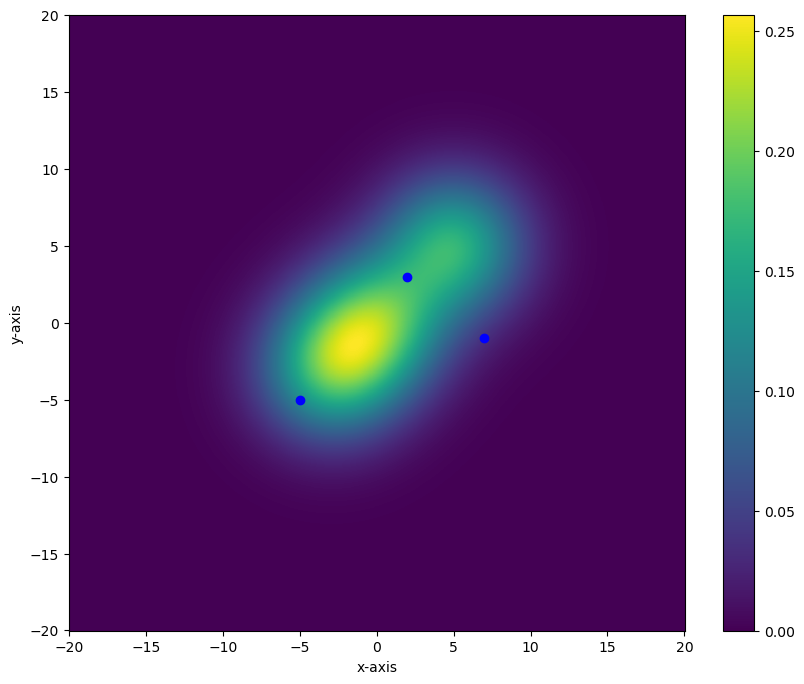

In [13]:
# define a lattice with custom positions
pos = [[-5,-5], [2,3], [7,-1]]
stg1.define_custom_lattice(pos)
stg1.draw(draw_lattice=True)

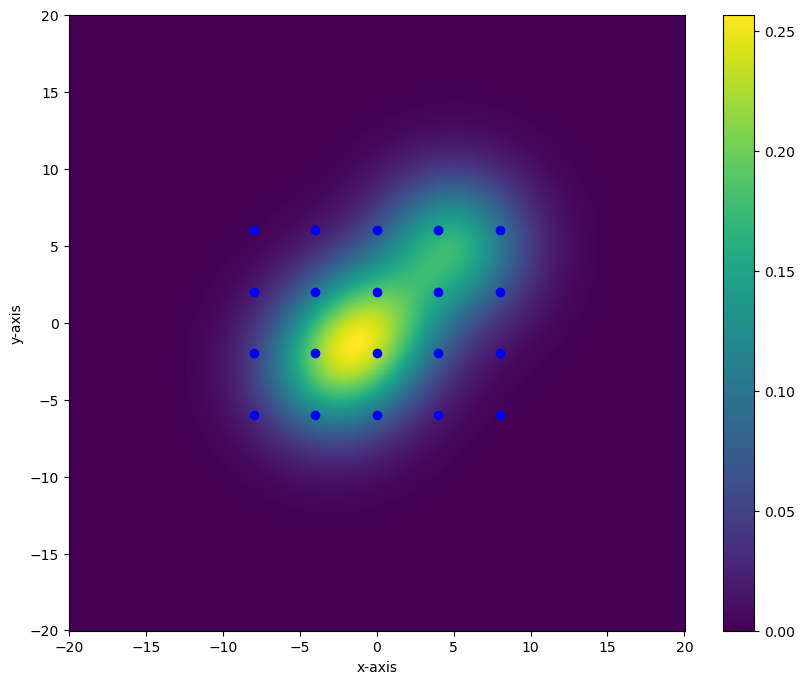

In [14]:
# clear existing lattice
stg1.clear_lattice()

# define a 5x4 rectangular lattice with lattice spacing 4
stg1.define_rectangular_lattice(xnum=5, ynum=4, spacing=4)
stg1.draw(draw_lattice=True)

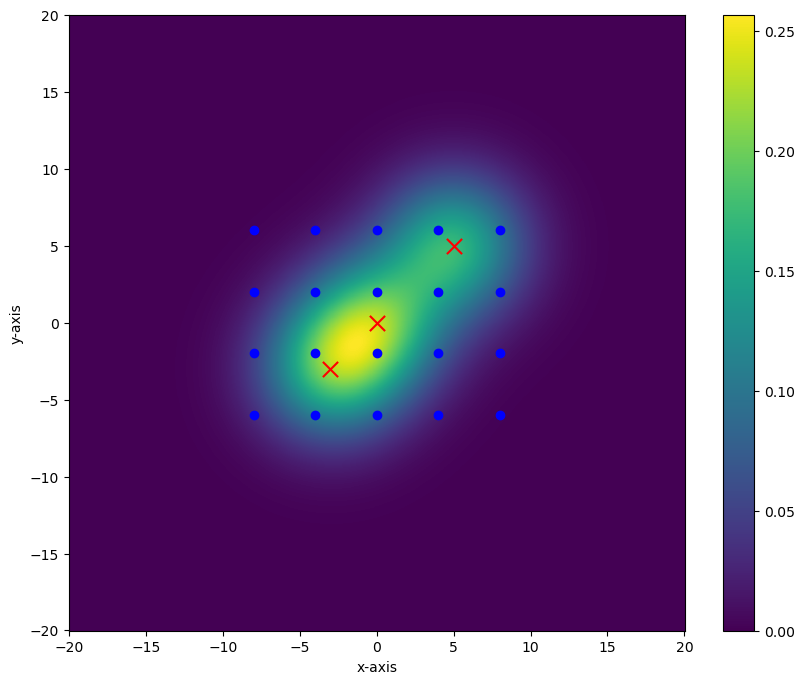

In [15]:
# lattice and centers can be displayed together
stg1.draw(draw_centers=True, draw_lattice=True)

## Cost functions, (Q)UBO coefficients
Once a density and a lattice has been defined, it is possible to calculate the coefficients of the (Q)UBO problem.<br>
The Q has been put in between parentheses because depending on the order of the Lp norm chosen, it can be more than quadratic.<br>

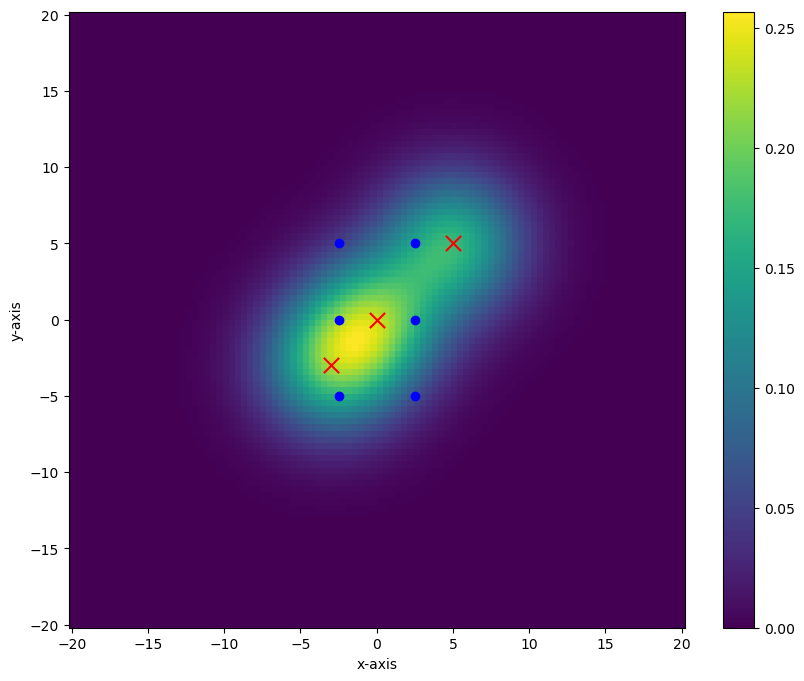

In [16]:
# define a canvas
stg = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=100,
    npoints_y=100,
)

# define a base density as a sum of Gaussians
stg.set_density_from_gaussians(
    centers = np.array([[0,0], [5,5], [-3,-3]]),
    amplitude = 10,
    variance = 10,
)

# define a small rectangular lattice (to make calculations faster)
stg.define_rectangular_lattice(xnum=2, ynum=3, spacing=5)
stg.draw(draw_centers=True, draw_lattice=True)

In [17]:
# now decide the order of the Lp norm and the parameters of the test Gaussian mixture
mixture_parameters = [15, 15]   # test amplitude and variance
p = 4   # order of the Lp norm

# calculate the coefficients
stg.calculate_ubo_coefficients(p, mixture_parameters)

In [18]:
# the coefficients are stored, together with the mixture parameters and the Lp order, in a dictionary
for key, val in stg._ubo.items():
    print(key, "=", val)

coeffs = {1: {(0,): -0.07933092005648532, (1,): -0.101925492152154, (2,): -0.059980674502117116, (3,): -0.06601628564735752, (4,): -0.09709243361451503, (5,): -0.06333445713020053}, 2: {(0, 1): 0.07561151171500019, (0, 2): 0.03721861311632703, (0, 3): 0.06970576757646263, (0, 4): 0.06223353056662445, (0, 5): 0.028808487842323493, (1, 2): 0.07160987714545229, (1, 3): 0.06451041215759996, (1, 4): 0.08313309893195245, (1, 5): 0.04998372495417834, (2, 3): 0.03098856629118714, (2, 4): 0.055522954221553025, (2, 5): 0.059978459135526296, (3, 4): 0.07287141514283617, (3, 5): 0.030506856634517177, (4, 5): 0.0569385665450592}, 3: {(0, 1, 2): -0.026781924941029746, (0, 1, 3): -0.02850151664122206, (0, 1, 4): -0.050491269193720864, (0, 1, 5): -0.024550786466960912, (0, 2, 3): -0.017232276363807888, (0, 2, 4): -0.026121867908705694, (0, 2, 5): -0.012453000608018867, (0, 3, 4): -0.005826933243925258, (0, 3, 5): -0.013809695521723377, (0, 4, 5): -0.021956790114807303, (1, 2, 3): -0.02455078646696092,

In [19]:
# to see them better, print the coefficients out order by order
for i in range(1, p+1):
    print(f"Coefficients of order {i}:")
    print(stg._ubo["coeffs"][i])
    print()

Coefficients of order 1:
{(0,): -0.07933092005648532, (1,): -0.101925492152154, (2,): -0.059980674502117116, (3,): -0.06601628564735752, (4,): -0.09709243361451503, (5,): -0.06333445713020053}

Coefficients of order 2:
{(0, 1): 0.07561151171500019, (0, 2): 0.03721861311632703, (0, 3): 0.06970576757646263, (0, 4): 0.06223353056662445, (0, 5): 0.028808487842323493, (1, 2): 0.07160987714545229, (1, 3): 0.06451041215759996, (1, 4): 0.08313309893195245, (1, 5): 0.04998372495417834, (2, 3): 0.03098856629118714, (2, 4): 0.055522954221553025, (2, 5): 0.059978459135526296, (3, 4): 0.07287141514283617, (3, 5): 0.030506856634517177, (4, 5): 0.0569385665450592}

Coefficients of order 3:
{(0, 1, 2): -0.026781924941029746, (0, 1, 3): -0.02850151664122206, (0, 1, 4): -0.050491269193720864, (0, 1, 5): -0.024550786466960912, (0, 2, 3): -0.017232276363807888, (0, 2, 4): -0.026121867908705694, (0, 2, 5): -0.012453000608018867, (0, 3, 4): -0.005826933243925258, (0, 3, 5): -0.013809695521723377, (0, 4, 5):

In [20]:
# focus on the coefficients of order 2
# they are a dictionary where the key is of the type (i,j) and the value is a number
# this gives you the interaction strength between lattice point i and j
for pair, strength in stg._ubo["coeffs"][2].items():
    print(f"interacting lattice points: {pair}      interaction strength: {strength}")

interacting lattice points: (0, 1)      interaction strength: 0.07561151171500019
interacting lattice points: (0, 2)      interaction strength: 0.03721861311632703
interacting lattice points: (0, 3)      interaction strength: 0.06970576757646263
interacting lattice points: (0, 4)      interaction strength: 0.06223353056662445
interacting lattice points: (0, 5)      interaction strength: 0.028808487842323493
interacting lattice points: (1, 2)      interaction strength: 0.07160987714545229
interacting lattice points: (1, 3)      interaction strength: 0.06451041215759996
interacting lattice points: (1, 4)      interaction strength: 0.08313309893195245
interacting lattice points: (1, 5)      interaction strength: 0.04998372495417834
interacting lattice points: (2, 3)      interaction strength: 0.03098856629118714
interacting lattice points: (2, 4)      interaction strength: 0.055522954221553025
interacting lattice points: (2, 5)      interaction strength: 0.059978459135526296
interacting l

In [21]:
# it is possible to truncate the calculation of the coefficients
# either from below (starting from terms of order > 1)
# or from above (ending with terms of order < p)
# by using the "high" and "low" arguments

# in this example, p=6 is used, but only coefficients of order 2,3,4 are calculated
stg.clear_ubo()
p=6
stg.calculate_ubo_coefficients(p, mixture_parameters, low=2, high=4)
for i in range(1, p+1):
    print(f"Coefficients of order {i}:")
    try:
        print(stg._ubo["coeffs"][i])
    except KeyError:
        print('missing')
    print()

Coefficients of order 1:
missing

Coefficients of order 2:
{(0, 1): 0.0039023762966717826, (0, 2): 0.0024523933406461885, (0, 3): 0.003528096010327347, (0, 4): 0.003534745281013107, (0, 5): 0.001945444217543813, (1, 2): 0.0034635483659920248, (1, 3): 0.0035281817842963063, (1, 4): 0.004168762101879386, (1, 5): 0.0025615713064730964, (2, 3): 0.0021819281040520843, (2, 4): 0.0029509625810260507, (2, 5): 0.0026067337770741108, (3, 4): 0.003666038665180087, (3, 5): 0.0018916508218136071, (4, 5): 0.0026271157934158514}

Coefficients of order 3:
{(0, 1, 2): -0.0021847442492109264, (0, 1, 3): -0.0023146342634564818, (0, 1, 4): -0.0033983403848999137, (0, 1, 5): -0.001885131376829646, (0, 2, 3): -0.0017095310393567351, (0, 2, 4): -0.002151390706938743, (0, 2, 5): -0.0012129705769360875, (0, 3, 4): -0.000947604478529266, (0, 3, 5): -0.0013583572159037052, (0, 4, 5): -0.0017695693616778152, (1, 2, 3): -0.002043841940943778, (1, 2, 4): -0.0019529912416450003, (1, 2, 5): 0.0005953094515573849, (1,

In [22]:
# once coefficients are calculated, it is possible to efficiently evaluate the cost of a bitstring

# calculate QUBO coefficients
stg.clear_ubo()
p=2
stg.calculate_ubo_coefficients(p, mixture_parameters)

# calcualte cost of random bitstrings
bitstrings = ["101011", "010010", "101100"]
for bs in bitstrings:
    print(f"cost of {bs}:", stg.calculate_bitstring_cost_from_coefficients(bs))


cost of 101011: -0.8449655352358898
cost of 010010: -3.2015054595749475
cost of 101100: -1.3145489258164997


In [23]:
# if truncation is not present, the cost can also be calculated directly from a norm
for bs in bitstrings:
    cost = stg.calculate_bitstring_cost_from_norm(
        bitstring = bs,
        mixture_params = mixture_parameters, 
        norm = Lp_norm, #choice of norm function
        norm_params = [2] #parameter for the norm, in this case it's just the order
    )
    print(f"cost of {bs}:", cost)


cost of 101011: -0.8449655352358896
cost of 010010: -3.201505459574947
cost of 101100: -1.3145489258165002
